# Noise validation

Read sample data, add noise to the first two shots, and plot before/after/noise for the first shot.

In [1]:
# Imports and paths
import sys
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# Ensure local package importable in notebooks
sys.path.append('src')

from blindspot_denoise.add_noise import add_noise

# Resolve dataset path (run this notebook from the 'examples' folder)
root = Path.cwd().parents[0]
data_path = root / 'tests' / 'test_seismic_data.npy'
data_path

PosixPath('/home/willsa/git/Transform2022_SelfSupervisedDenoising/tests/test_seismic_data.npy')

In [2]:
# Load data and select the first two shots
data = np.load(data_path)
assert data.ndim == 3, 'Expected data of shape (shots, time, traces)'
clean_two = data[:2].copy()
clean_two.shape

(2, 601, 320)

In [3]:
# Add noise to the first two shots using library function
num_noisy_traces = 9
noisy_trace_value = 1.0
seed = 123

noisy_two = add_noise(
    clean_two,
    num_noisy_traces=num_noisy_traces,
    noisy_trace_value=noisy_trace_value,
    num_realisations=1,
    seed=seed,
)
noisy_two.shape

(2, 601, 320)

In [4]:
# Prepare first-shot arrays and compute noise image
clean_first = clean_two[0]
noisy_first = noisy_two[0]
noise_first = noisy_first - clean_first
clean_first.shape, noisy_first.shape, noise_first.shape

((601, 320), (601, 320), (601, 320))

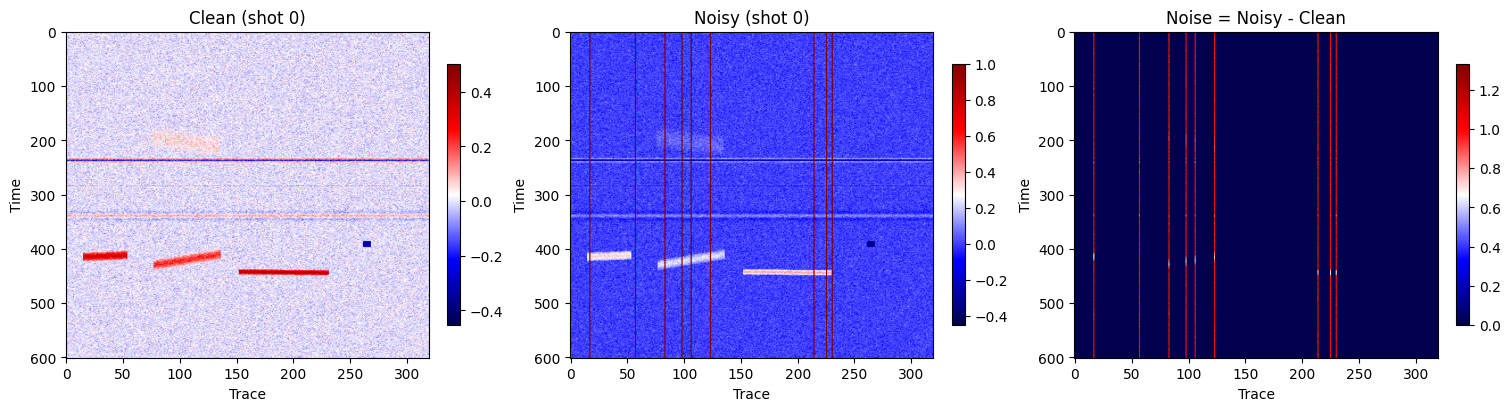

In [5]:
# Plot: clean / noisy / noise for the first shot
fig, axes = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)
titles = ['Clean (shot 0)', 'Noisy (shot 0)', 'Noise = Noisy - Clean']
images = [clean_first, noisy_first, noise_first]

for ax, img, title in zip(axes, images, titles):
    im = ax.imshow(img, aspect='auto', origin='upper', cmap='seismic')
    ax.set_title(title)
    ax.set_xlabel('Trace')
    ax.set_ylabel('Time')
    fig.colorbar(im, ax=ax, shrink=0.8)

plt.show()